Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')


# Split the train data into the train and validation datasets

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=1)

train.shape, val.shape, test.shape, 

((47520, 41), (11880, 41), (14358, 40))

In [87]:
test.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

### Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.

In [0]:
# function to wrangle the training, validation, and test sets in same way

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Also create a "missing indicator" column, because the fact that
    # values are missing may be a predictive signal.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by']
    X = X.drop(columns=unusable_variance)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()
    
    # return the wrangled dataframe
    return X


In [0]:
import numpy as np


In [0]:
# apply the function to the train, val, and test sets

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features



In [0]:
# arrange into the X features matrix and the y vector

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

### Try Ordinal Encoding & a Random Forest classifier

In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Ordinal encoding with Random Forest Classifier

In [94]:
# make pipeline

%%time
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=1, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Validation accuracy', pipeline.score(X_val, y_val))

Validation accuracy 0.8015151515151515
CPU times: user 11 s, sys: 55.9 ms, total: 11.1 s
Wall time: 11.1 s


#### One Hot Encoding with Random Forest Classifier

In [95]:
# make pipeline

%%time

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=1, random_state=42)

)

pipeline.fit(X_train, y_train)
print('Validation accuracy', pipeline.score(X_val, y_val))

Validation accuracy 0.8034511784511784
CPU times: user 19.9 s, sys: 141 ms, total: 20.1 s
Wall time: 20.1 s


a quick comparison of the OneHotEncoding (OHE) vs the Ordinal encoding shows that the OHE performed marginally better. 

### visualize the max depth and min leafs of Random Forest Classifier

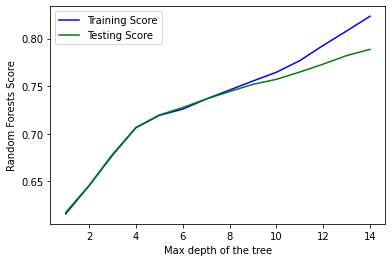

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

depth_range = 15
testing, training, depth = [], [], []

for i in range(1, depth_range):

  pipeline = make_pipeline(
  ce.OneHotEncoder(use_cat_names=True),
  SimpleImputer(strategy='mean'),
  RandomForestClassifier(n_jobs=1, random_state=42, max_depth=i)
  )
  pipeline.fit(X_train, y_train)
  test_score = pipeline.score(X_val, y_val)
  train_score = pipeline.score(X_train, y_train)
  
  depth.append(i)
  training.append(train_score)
  testing.append(test_score)
  
 
plt.plot(depth, training, label='Training Score', color='b')
plt.plot(depth, testing, label='Testing Score', color='g')
plt.ylabel("Random Forests Score")
plt.xlabel("Max depth of the tree")
plt.legend()
# plt.axvline(4,color='gray')
plt.show()

# Why do we expect our training score to increase?
# What max depth of tree seems to maximize our testing score?

This looks like we were still seeing an increase in the validation score at a depth of 15. Lets visualize this again but start our range at 10 and go to 20.

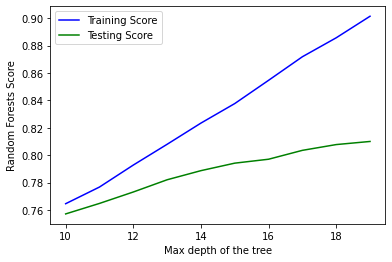

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

depth_range = 20
testing, training, depth = [], [], []

for i in range(10, depth_range):

  pipeline = make_pipeline(
  ce.OneHotEncoder(use_cat_names=True),
  SimpleImputer(strategy='mean'),
  RandomForestClassifier(n_jobs=1, random_state=42, max_depth=i)
  )
  pipeline.fit(X_train, y_train)
  test_score = pipeline.score(X_val, y_val)
  train_score = pipeline.score(X_train, y_train)
  
  depth.append(i)
  training.append(train_score)
  testing.append(test_score)
  
 
plt.plot(depth, training, label='Training Score', color='b')
plt.plot(depth, testing, label='Testing Score', color='g')
plt.ylabel("Random Forests Score")
plt.xlabel("Max depth of the tree")
plt.legend()
# plt.axvline(4,color='gray')
plt.show()

# Why do we expect our training score to increase?
# What max depth of tree seems to maximize our testing score?

It looks like it levels off around 18-19 for the max depth. When we run on our final test data we will use that as the paremeter setting for max depth


what about the min leafs?

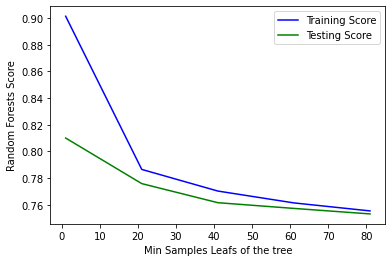

CPU times: user 1min 22s, sys: 720 ms, total: 1min 23s
Wall time: 1min 23s


In [70]:
%%time
%matplotlib inline

min_leaf_range = 100
testing, training, min_sample_leafs = [], [], []



for i in range(1, min_leaf_range, 20):

  pipeline = make_pipeline(
  ce.OneHotEncoder(use_cat_names=True),
  SimpleImputer(strategy='mean'),
  RandomForestClassifier(n_jobs=1, random_state=42, max_depth=19, min_samples_leaf=i)
  )
  pipeline.fit(X_train, y_train)
  test_score = pipeline.score(X_val, y_val)
  train_score = pipeline.score(X_train, y_train)
  
  min_sample_leafs.append(i)
  training.append(train_score)
  testing.append(test_score)
  
 
plt.plot(min_sample_leafs, training, label='Training Score', color='b')
plt.plot(min_sample_leafs, testing, label='Testing Score', color='g')
plt.ylabel("Random Forests Score")
plt.xlabel("Min Samples Leafs of the tree")
plt.legend()
# plt.axvline(4,color='gray')
plt.show()

# Why do we expect our training score to increase?
# What max depth of tree seems to maximize our testing score?

### What are the most important features?

In [61]:
# get encoded values

encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

X_train shape after encoding (47520, 182)


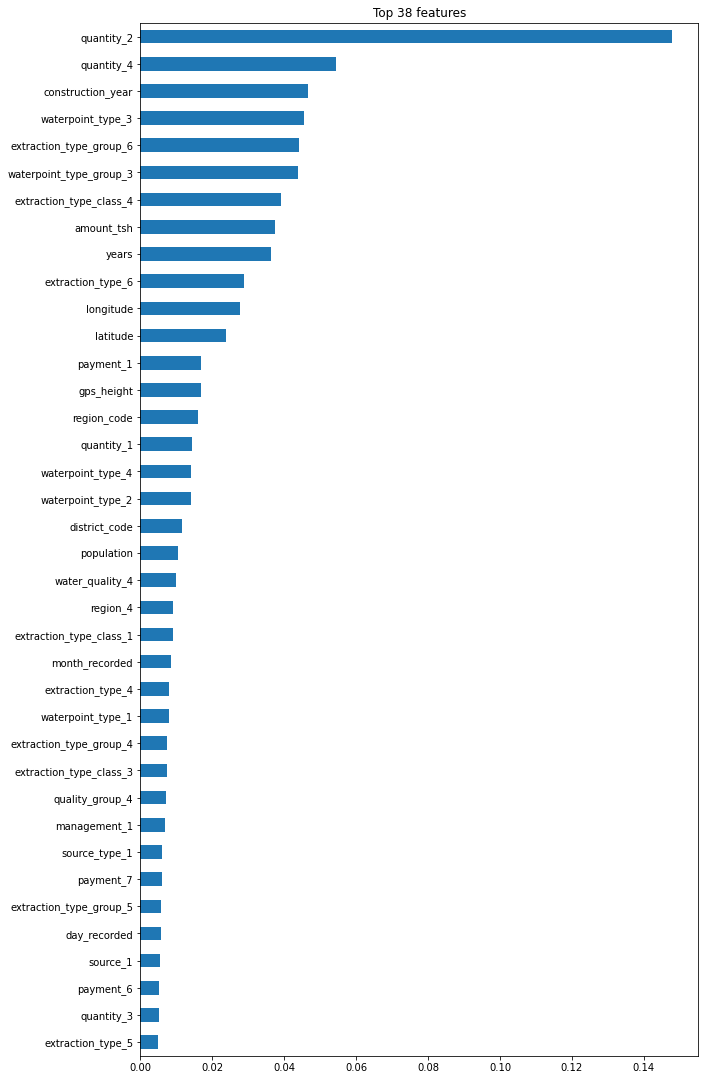

In [65]:
# plot the top 20 features
n = len(features)
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh()
plt.show()

### Get the predicted values for the Test data

In [96]:
pipeline = make_pipeline(
  ce.OneHotEncoder(use_cat_names=True),
  SimpleImputer(strategy='mean'),
  RandomForestClassifier(n_jobs=1, random_state=42, max_depth=19, min_samples_leaf=2)
  )

pipeline.fit(X_train, y_train)

print('Training accuracy is: ', pipeline.score(X_train, y_train))
print('Validation accuracy is: ', pipeline.score(X_val, y_val))

Training accuracy is:  0.8531776094276095
Validation accuracy is:  0.8053872053872054


In [97]:
pipeline = make_pipeline(
  ce.OneHotEncoder(use_cat_names=True),
  SimpleImputer(strategy='mean'),
  RandomForestClassifier(n_jobs=1, random_state=42, max_depth=19, min_samples_leaf=1)
  )

pipeline.fit(X_train, y_train)

print('Training accuracy is: ', pipeline.score(X_train, y_train))
print('Validation accuracy is: ', pipeline.score(X_val, y_val))

Training accuracy is:  0.9013678451178451
Validation accuracy is:  0.810016835016835


In [99]:
# looks like the 1 min_samples_leaf had the better validation accuracy
# run that on the test data and save to Kaggle

y_pred = pipeline.predict(X_test)

submission = test[['id']].copy()
submission['status_group'] = y_pred

submission.to_csv('water_pumps.csv', index=False)

print(submission.shape)

(14358, 2)


In [85]:
test.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,longitude_MISSING,latitude_MISSING,construction_year_MISSING,gps_height_MISSING,population_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING
0,0.0,Dmdd,1996.0,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321.0,True,Parastatal,NaN,True,2012.0,other,other,other,parastatal,parastatal,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,False,False,False,False,False,2013,2,4,1.0,False
1,0.0,Government Of Tanzania,1569.0,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300.0,True,VWC,TPRI pipe line,True,2000.0,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,False,False,False,2013,2,4,13.0,False
2,0.0,NaN,1567.0,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500.0,True,VWC,P,NaN,2010.0,other,other,other,vwc,user-group,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,False,False,False,False,False,2013,2,1,3.0,False
3,0.0,Finn Water,267.0,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250.0,NaN,VWC,NaN,True,1987.0,other,other,other,vwc,user-group,unknown,soft,good,dry,shallow well,shallow well,groundwater,other,other,False,False,False,False,False,2013,1,22,26.0,False
4,500.0,Bruder,1260.0,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60.0,NaN,Water Board,BRUDER,True,2000.0,gravity,gravity,gravity,water board,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,False,False,False,2013,3,27,13.0,False
